In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import seaborn as sns
import scipy 

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline  
# 为了在jupyter notebook里作图，需要用到这个命令

In [2]:
train_file = "../kaggleHousePrice/kaggle_house_price_dataset/train.csv"

data_train = pd.read_csv(train_file)
print(data_train.head)

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60

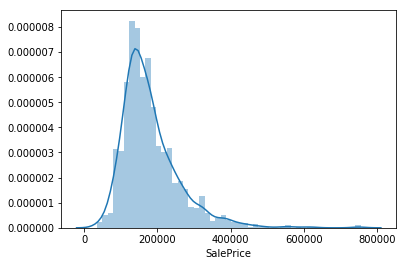

In [3]:
data_train['SalePrice'].describe()
sns.distplot(data_train['SalePrice'])


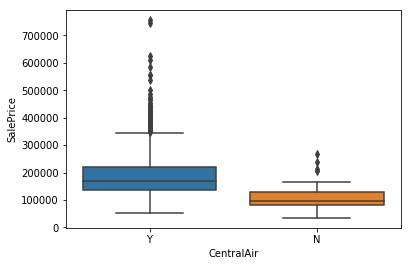

In [4]:
#验证所选类别性特征是否和最终房价有一定关系
#CentralAir
var = 'CentralAir'
data = pd.concat([data_train['SalePrice'], data_train[var]], 
                 axis=1)
fig = sns.boxplot(x=var, y='SalePrice', data=data)


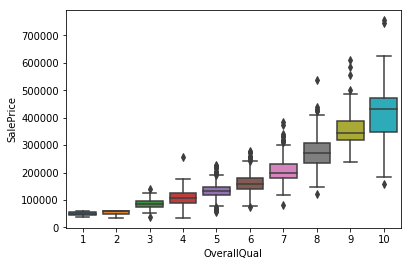

In [5]:
#验证所选类别性特征是否和最终房价有一定关系
#OverallQual
data2 = pd.concat([data_train['SalePrice'], data_train['OverallQual']],
                axis=1)
fig2 = sns.boxplot(x='OverallQual', y='SalePrice', data=data2)

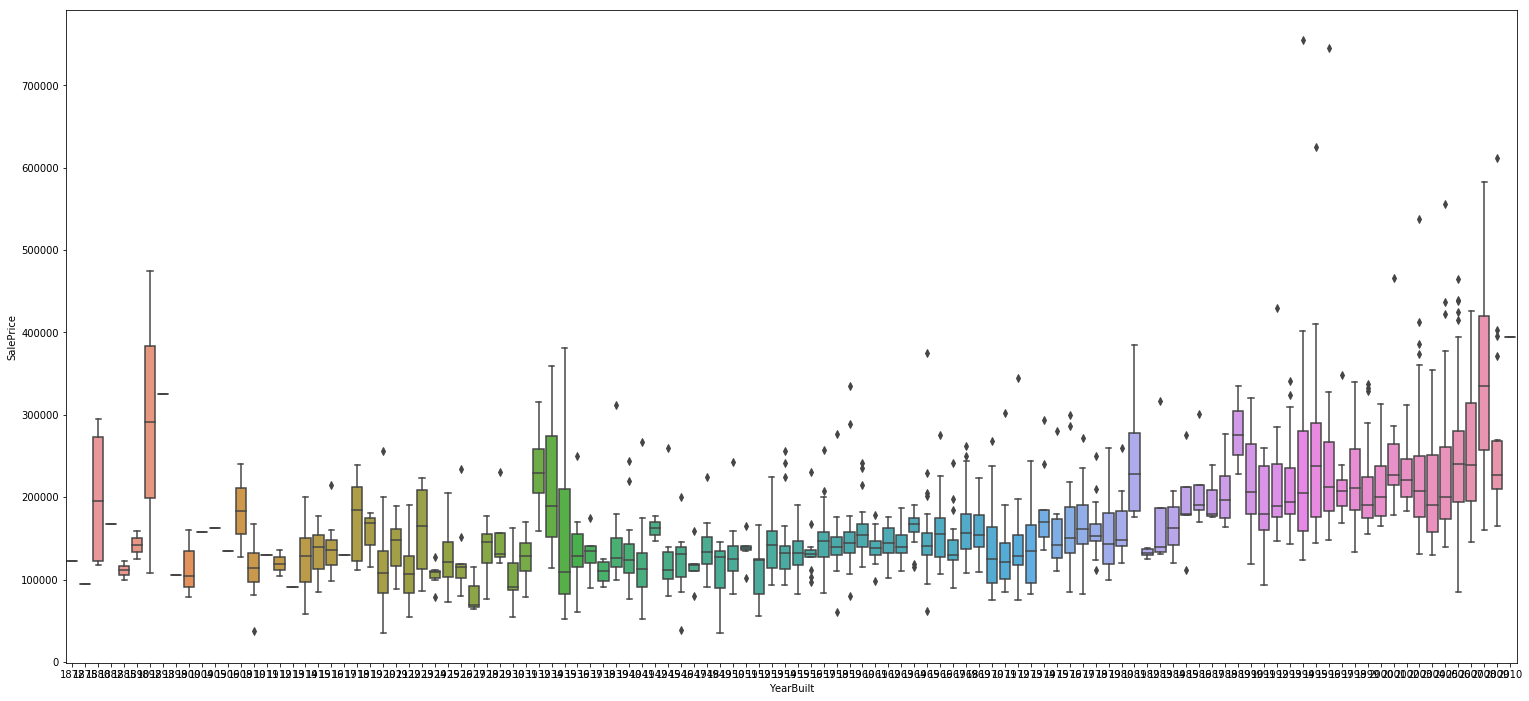

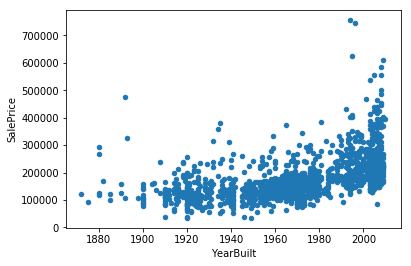

In [6]:
#验证所选类别性特征是否和最终房价有一定关系
#YearBuilt
data3 = pd.concat([data_train['SalePrice'], data_train['YearBuilt']],
                 axis=1)
f, ax = plt.subplots(figsize=(26, 12))
fig3 = sns.boxplot(x='YearBuilt', y='SalePrice', data=data3)
data3.plot.scatter(x='YearBuilt', y='SalePrice')

#数据清洗
data_train.drop(data_train[(data_train['YearBuilt']<1900)].index,inplace=True)


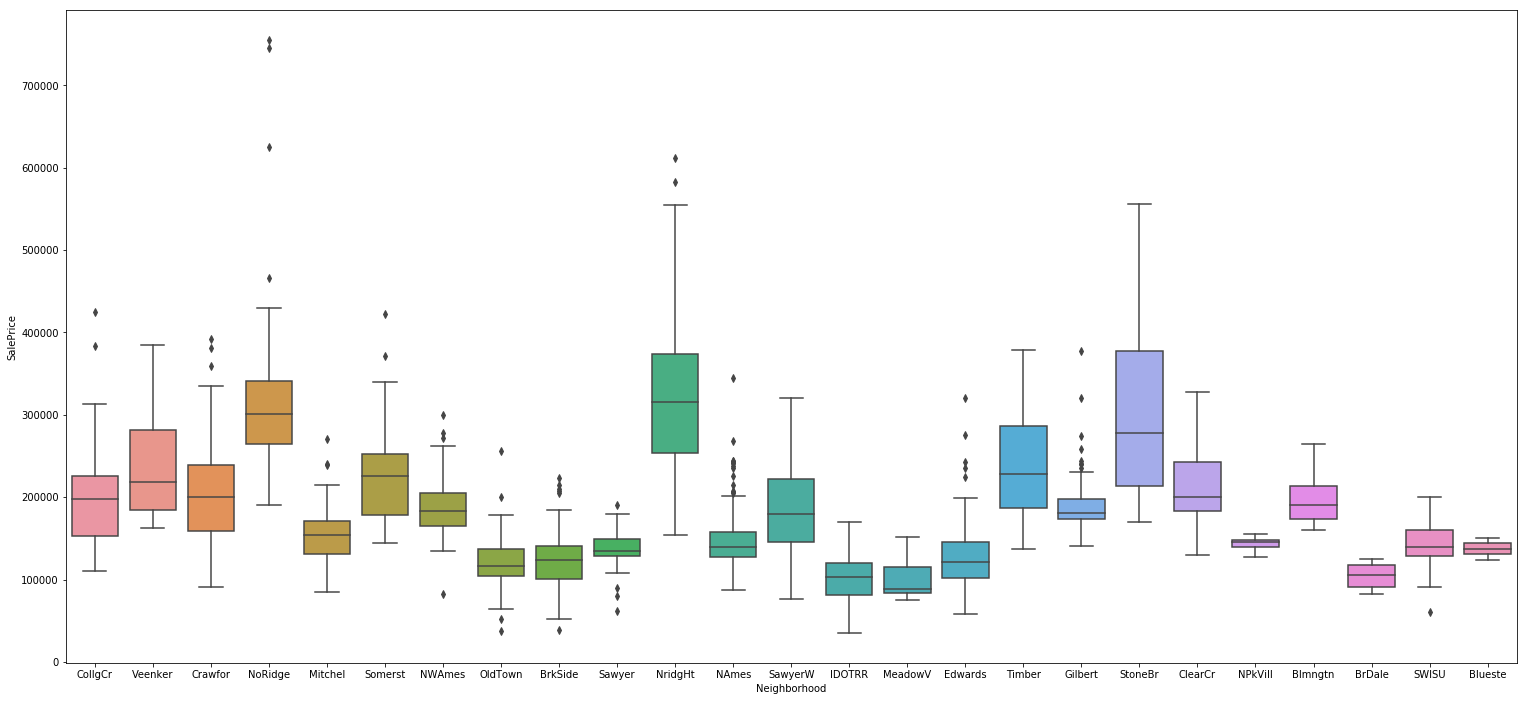

In [7]:
#验证所选类别性特征是否和最终房价有一定关系
# Neighborhood
data4 = pd.concat([data_train['SalePrice'], data_train['Neighborhood']],
                  axis=1)
f, ax = plt.subplots(figsize=(26, 12))
fig4 = sns.boxplot(x='Neighborhood', y="SalePrice", data=data4)

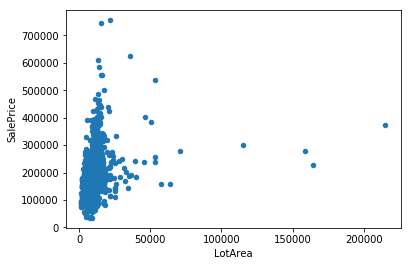

In [8]:
#验证所选数值型性特征是否和最终房价有一定关系
#LotArea
data5 = pd.concat([data_train['SalePrice'], data_train['LotArea']],
                  axis=1)
data5.plot.scatter(x='LotArea', y='SalePrice')

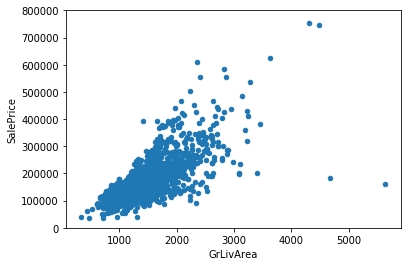

In [9]:
#验证所选数值型性特征是否和最终房价有一定关系
#GrLivArea
data6 = pd.concat([data_train['SalePrice'], data_train['GrLivArea']], axis=1)
data6.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0, 800000))

#清洗异常值
data_train.drop(data_train[(data_train['GrLivArea']>4000)].index,inplace=True)


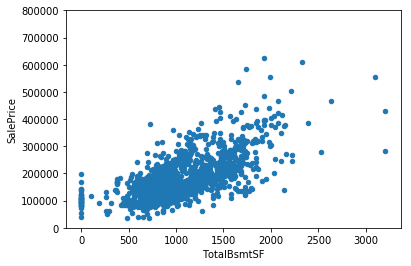

In [10]:
#验证所选数值型性特征是否和最终房价有一定关系
#TotalBsmtSF
data7 = pd.concat([data_train['SalePrice'], data_train['TotalBsmtSF']], axis=1)
data7.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0, 800000))

#数据清洗
data_train.drop(data_train[(data_train['TotalBsmtSF']>3000)].index,inplace=True)


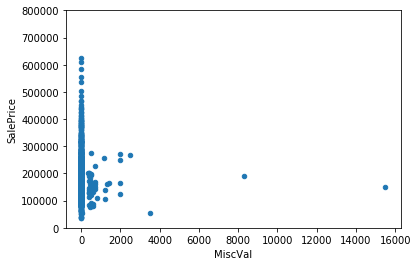

In [11]:
#验证所选数值型性特征是否和最终房价有一定关系
#MiscVal
data8 = pd.concat([data_train['SalePrice'], data_train['MiscVal']], axis=1)
data8.plot.scatter(x='MiscVal', y='SalePrice', ylim=(0, 800000))

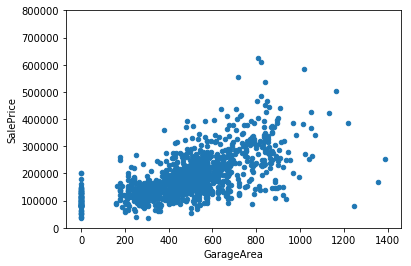

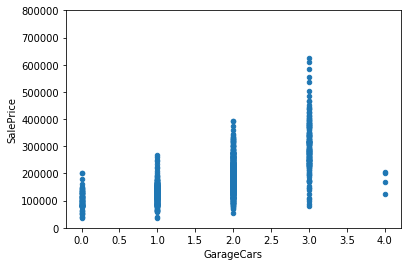

In [12]:
#验证所选数值型性特征是否和最终房价有一定关系
#MiscVal
var1 = ['GarageArea', 'GarageCars']
for i in range(len(var1)):
    data9 = pd.concat([data_train['SalePrice'], data_train[var1[i]]], axis=1)
    data9.plot.scatter(x=var1[i], y='SalePrice', ylim=(0, 800000))

In [13]:
#GrLivArea, TotalBsmtSF, GarageArea/GarageCars, YearBuilt, 
#CentralAir, OverallQual, Neighborhood
# 8 features were selected 

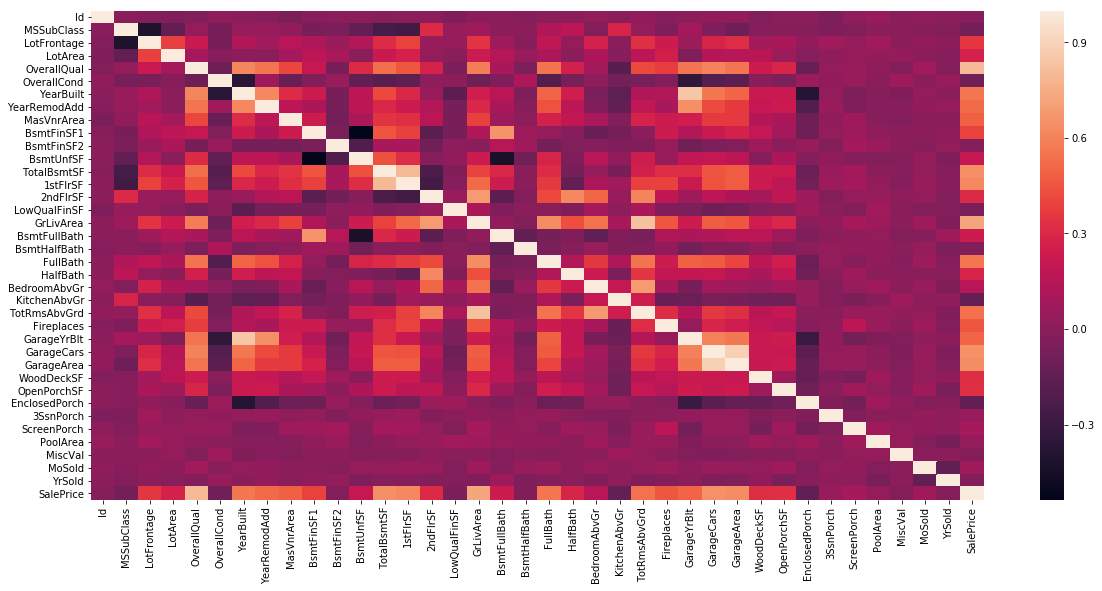

In [14]:
#各个特征之间的关系矩阵（correlation matrix）
corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat)

In [15]:
#上面的关系图只包含数值型特征，没有类别性的特征（eg：neighborhood）

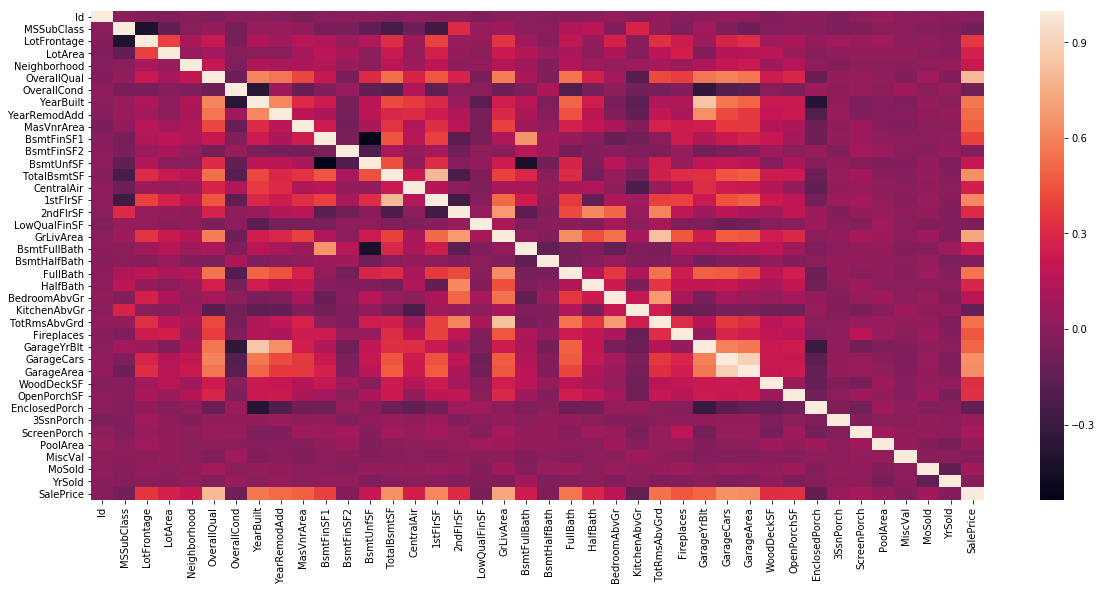

In [16]:
#使用sklearn对类别型特征进行处理
from sklearn import preprocessing
names = ['CentralAir', 'Neighborhood']
for x in names:
    #LabelEncoder可以将标签分配一个0—n_classes-1之间的编码 
    label = preprocessing.LabelEncoder()
    #fit_transform返回一个数值
    data_train[x] = label.fit_transform(data_train[x])
corrmat2 = data_train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat2)

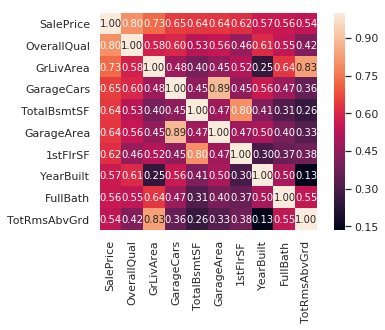

In [17]:
#房价关系矩阵
#取十个相关系数最高的标签
k  = 10 # 关系矩阵中将显示10个特征
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
#得到标签之间的相关系数
cm = np.corrcoef(data_train[cols].values.T)
sns.set()
hm = sns.heatmap(cm, cbar=True, annot=True, \
                 square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [18]:
#缺失数据处理
total= data_train.isnull().sum().sort_values(ascending=False)
percent = (data_train.isnull().sum()/data_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1433,0.996523
MiscFeature,1385,0.963143
Alley,1353,0.940890
Fence,1162,0.808067
FireplaceQu,680,0.472879
LotFrontage,258,0.179416
GarageCond,79,0.054937
GarageType,79,0.054937
GarageYrBlt,79,0.054937
GarageFinish,79,0.054937


In [19]:
#当超过 15% 的数据都缺失的时候，应该删掉相关变量且假设该变量并不存在。
#GarageX 变量群的缺失数据量都相同，由于关于车库的最重要的信息都可以由 GarageCars 表达，
#并且这些数据只占缺失数据的 5%，也删除 GarageX 变量群
# 最后，由于 Electrical 中只有一个损失的观察值，所以我们删除这个观察值，但是保留这一变量。
data_train= data_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
data_train= data_train.drop(data_train.loc[data_train['Electrical'].isnull()].index)
data_train.isnull().sum().max() #justchecking that there's no missing data missing...

0

In [20]:
# 获取数据
cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
       'FullBath', 'YearBuilt']
x = data_train[cols].values
y = data_train['SalePrice'].values

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [27]:
x_scaled = preprocessing.StandardScaler().fit_transform(x)
y_scaled = preprocessing.StandardScaler().fit_transform(y.reshape(-1,1))
X_train, X_test, y_train, y_test = train_test_split(x_scaled, 
                y_scaled, test_size=0.33, random_state=42)
model1 = RandomForestRegressor()
model1.fit(X_train, y_train)
y_predict = model1.predict(X_test)
print(sum(abs(y_predict-y_test))/len(y_predict))


[0.94415546 0.71693596 1.20212516 0.74866533 1.38041801 0.71718645
 2.26756534 2.04921071 2.26691152 0.94680613 0.70720934 0.73149165
 0.96484247 0.74313359 0.70810866 0.76720467 1.30127397 0.73219756
 0.99783775 0.86022458 0.85725682 0.69046976 1.67848903 1.43463783
 0.94577054 0.69737956 1.106181   2.28209397 0.82397969 0.71574126
 0.69062147 1.23172309 1.84691953 0.70382025 0.7722291  0.87593377
 1.03465144 0.96919488 0.82276824 0.79971719 1.02509077 0.746438
 0.85950567 3.75506701 0.95133231 0.72972544 1.01704469 0.76132663
 0.71907053 0.80535237 0.72708038 1.0779402  0.72576019 1.23686979
 0.6904706  0.93754833 0.7174306  0.70615965 0.96798977 0.82887335
 1.05380233 0.69307669 0.79801251 0.91927774 0.72395783 1.42021345
 0.69060961 0.71419037 0.997666   1.1827714  0.72176327 0.89054232
 1.95927803 1.12383338 1.44090972 0.91821898 0.75777408 0.75600157
 0.69310098 0.73528179 0.78241811 1.0972016  0.87199232 1.05116465
 0.77121473 0.69551201 0.74513834 0.71127938 0.75836612 0.691572

In [29]:
data_test = pd.read_csv("../kaggleHousePrice/kaggle_house_price_dataset/test.csv")
data_test[cols].isnull().sum()

OverallQual    0
GrLivArea      0
GarageCars     1
TotalBsmtSF    1
FullBath       0
YearBuilt      0
dtype: int64

In [33]:
data_test['GarageCars'].describe()

count    1458.000000
mean        1.766118
std         0.775945
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: GarageCars, dtype: float64

In [34]:
data_test['TotalBsmtSF'].describe()

count    1458.000000
mean     1046.117970
std       442.898624
min         0.000000
25%       784.000000
50%       988.000000
75%      1305.000000
max      5095.000000
Name: TotalBsmtSF, dtype: float64

In [41]:
data_test['GarageCars'].fillna(1.766118, inplace=True)
data_test['TotalBsmtSF'].fillna(1046.117970, inplace=True)

In [42]:
data_test[cols].isnull().sum()

OverallQual    0
GrLivArea      0
GarageCars     0
TotalBsmtSF    0
FullBath       0
YearBuilt      0
dtype: int64

In [46]:
x = data_test[cols].values
y = model1.predict(x)
print(y)
print(y.shape)
print(x.shape)

[4.15221946 4.15221946 5.32120772 ... 4.15221946 3.8167685  5.32120772]
(1459,)
(1459, 6)


In [49]:
prediction = pd.DataFrame(y, columns=['SalePrice'])
result = pd.concat([ data_test['Id'], prediction], axis=1)
print(result)


        Id  SalePrice
0     1461   4.152219
1     1462   4.152219
2     1463   5.321208
3     1464   5.321208
4     1465   5.321208
5     1466   5.321208
6     1467   5.321208
7     1468   5.321208
8     1469   4.152219
9     1470   4.152219
10    1471   5.321208
11    1472   4.152219
12    1473   4.152219
13    1474   5.321208
14    1475   4.152219
15    1476   5.321208
16    1477   5.321208
17    1478   5.321208
18    1479   5.321208
19    1480   5.321208
20    1481   5.321208
21    1482   5.321208
22    1483   5.321208
23    1484   5.321208
24    1485   5.321208
25    1486   5.321208
26    1487   5.321208
27    1488   5.321208
28    1489   5.321208
29    1490   5.321208
...    ...        ...
1429  2890   4.152219
1430  2891   5.321208
1431  2892   2.667117
1432  2893   4.985757
1433  2894   3.816768
1434  2895   5.321208
1435  2896   5.321208
1436  2897   5.321208
1437  2898   5.321208
1438  2899   5.321208
1439  2900   5.321208
1440  2901   4.152219
1441  2902   5.321208
1442  2903

In [48]:
result.to_csv("../kaggleHousePrice/kaggle_house_price_dataset/Prediction.csv", index=False)